### Queue(큐)

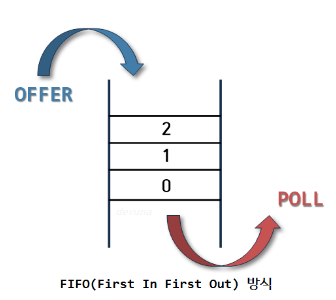

### 1.1 Queue 성질

- 큐는 한쪽 끝에서 삽입 작업이, 다른쪽 끝에서 삭제 작업이 양쪽으로 이루어짐
- (<-> 정해진 한 곳(top)을 통해서 삽입, 삭제가 이루어지는 스택)
- 삭제 연산만 수행되는 곳 `프론트(front)`, 삽입연산만 이루어지는 곳 `리어(rear)` 각각의 연산작업만 수행
- `큐의 리어(rear)에서 이루어지는 삽입연산`을 `인큐(enQueue)`, `프론트에서 이루어지는 삭제연산`을 `디큐(dnQueue)`라 부름
- 큐의 가장 첫 원소를 'front'
- 큐의 가장 끝 원소를 'rear'
- 큐는 들어올 때 rear로 들어오지만 나올 때는 front로 빠지는 특성
- 접근방법은 가장 첫 원소와 끝 원소로만 가능
- 가장 먼저 들어온 프론트 원소가 가장 먼저 삭제 
- 즉, 큐에서 프론트 원소는 가장 먼저 큐에 들어왔던 첫 번째 원소가 되는 것이며, 리어 원소는 가장 늦게 큐에 들어온 마지막 원소가 됨


### 1.2 Queue 활용 예시

- 큐는 주로 데이터가 입력된 시간 순서대로 처리해야 할 필요가 있는 상황에 이용함
- 우선순위가 같은 작업 예약(프린터의 인쇄 대기열)
- 은행업무, 콜센터 고객 대기시간
- 프로세스 관리
- 너비 우선 탐색(BFS, Breadth-First Search) 구현
- 캐시(Cache)구현 


### 1.3 일반적인 큐(FIFO 정책)
- queue.Queue()로 Queue 객체 생성
- enqueue 방법 : Queue객체.put(데이터)  : 삽입할 데이터를 인자로 넣음
- dequeue 방법 : Queue객체.get()  : 제일 먼저 들어간 데이터를 추출하기 때문에 인자가 들어가지 않음

In [7]:
import queue

data_queue = queue.Queue()
data_queue.put('queue')
data_queue.put('python')
data_queue.put(100)
print(data_queue.qsize())
print(data_queue.get())
print(data_queue.qsize())

3
queue
2


### 1.4 LifoQueue(LIFO 정책)

- `LifoQueue`는 마지막에 들어간 것이 먼저 나오는 LIFO 정책을 사용(stack과 유사)
- get을 통해 dequeue 하면, 마지막에 put한 데이터가 반환되고 삭제되는 것을 볼 수 있음

In [8]:
import queue

data_queue = queue.LifoQueue()
data_queue.put('lifoqueue')
data_queue.put('python')
data_queue.put(100)
print(data_queue.qsize())
print(data_queue.get())
print(data_queue.qsize())

3
100
2


### 1.5 PriorityQueue(우선순위 큐)

- 우선순위 큐는 데이터를 삽입할 때 마다 우선순위 번호를 넣어, 우선 순위에 따라 데이터를 추출
- 일반적인 Queue & LifoQueue는 데이터가 enqueque된 시간적 순서와 dequeque가 관련있으나, PriorityQueue는 우선순위에 따라 dequeque가 처리됨
- PriorityQueu enqueue 방법 : Queue객체.put((순위,데이터))

In [9]:
import queue

data_queue = queue.PriorityQueue()
data_queue.put((10, 'priorityQueue'))
data_queue.put((5, 'python'))
data_queue.put((1, 100))

print(data_queue.qsize())
print(data_queue.get()) # 우선순위가 높은(번호가 낮은) 것부터 추출
print(data_queue.get())

3
(1, 100)
(5, 'python')


### 1.6 Queue 구현

- python에서 큐를 구현할때 Array.pop()도 가능하지만, 시간 복잡도가 높아 덱(deque) 라이브러리 사용
- Array.pop(0)은 배열의 첫번째 요소를 꺼낸 뒤, 공백으로 만든 후 한칸씩 앞으로 요소를 옮겨, 마지막 빈 요소의 공간을 최종적으로 제거하기 때문에 O(N)의 복잡도를 가짐
- 큐는 DFS를 구현할 때 자주 사용함

In [1]:
queue = list()
queue.append(5)
queue.append(6)
queue.append(7)
print(queue)
front = queue.pop(0)
print(queue)

#pop(0)으로 queue를 구현했을 때 O(n)의 복잡도로
#[5,6,7] -> [-,6,7] -> [6, -, 7] -> [6,7,-] -> [6,7]

[5, 6, 7]
[6, 7]


- queue를 다룰 때는 deque 라이브러리 사용
- deque는 시간복잡도 O(1) 이기 때문에 효율적
- deque 라이브러리로 처리한 결과를 list로 캐스팅하면 배열로 반환받을 수 있음

In [3]:
from collections import deque

queue = deque()
queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft()
queue.append(1)
queue.append(4)
queue.popleft()
print(queue) # deque([3,7,1,4])
queue.reverse()
print(queue)

deque([3, 7, 1, 4])
deque([4, 1, 7, 3])


In [4]:
from queue import deque

queue = deque()
queue.append(5)
queue.append(6)
queue.append(7)
queue.append(8)
print(queue)
front = queue.popleft()
print(front)
print(queue)
print(list(queue))

deque([5, 6, 7, 8])
5
deque([6, 7, 8])
[6, 7, 8]


In [5]:
def queue_push(q, data):
    q.append(data)
    
def queue_pop(q):
    front = q.popleft()
    return front

queue = deque()
queue_push(queue,5)
queue_push(queue,6)
queue_push(queue,7)
queue_push(queue,8)
front = queue_pop(queue)
print(front)
print(list(queue))

5
[6, 7, 8]
